<a href="https://colab.research.google.com/github/TanyaAgrwal/Machine-learning/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION USING SUPERVISED ML**

# **SUBMITTED BY- TANYA AGARWAL**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Student_performance.csv to Student_performance (2).csv
User uploaded file "Student_performance.csv" with length 214 bytes


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(io.StringIO(uploaded['Student_performance.csv'].decode('utf-8')))
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


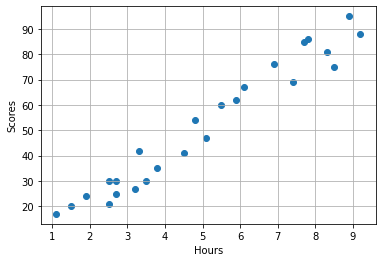

In [3]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

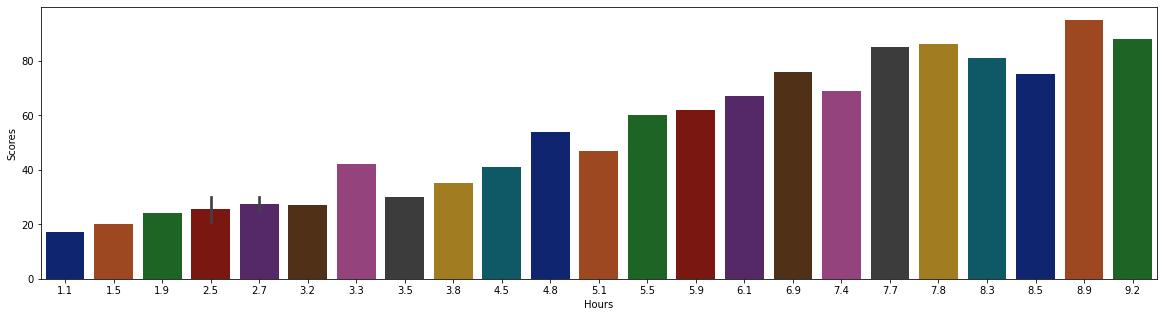

In [4]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['Hours'], y=df['Scores'], palette='dark')

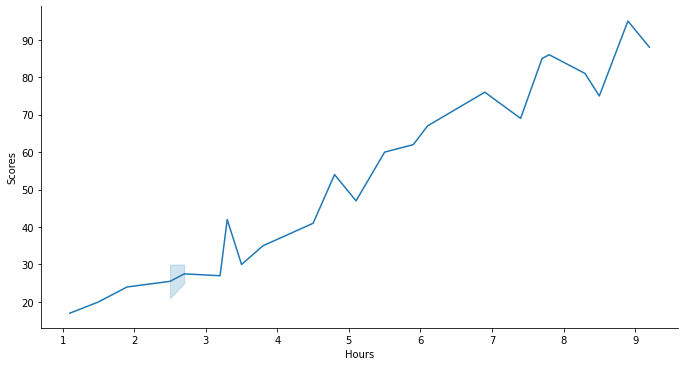

In [5]:
g=sns.relplot(x=df['Hours'], y=df['Scores'], palette='dark', kind='line')
g.fig.set_figwidth(10)
g.fig.set_figheight(5)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x=df['Hours'].values
x=x.reshape(-1,1)
y=df['Scores'].values
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print(metrics.r2_score(y_test, y_pred))

0.9454906892105354


In [7]:
print('Hours studied by student: ', 9.25)
prediction=model.predict(np.array([[9.25]])).reshape(-1,1)
print("Predicted score of student: ", prediction[0][0])

Hours studied by student:  9.25
Predicted score of student:  93.69173248737539


In [8]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))

MSE:  21.598769307217456
MAE:  4.183859899002982


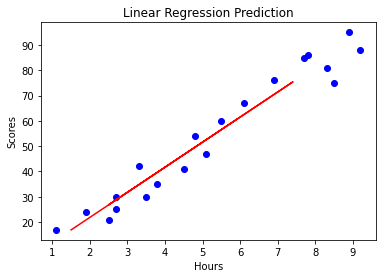

In [9]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()